## Import and environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:/Users/Leo-PC/Desktop/OpenClassroom Stuff/Projet 2/datas/"

## Code Pré-analyse

### EdStatsCountry

In [2]:
country = pd.read_csv(path + 'EdStatsCountry.csv')
country.head(5)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [3]:
print(country.shape)
#Il y'a un total de 32 colonnes pour 241 entités
all_countries = country['Short Name'].tolist()
print(all_countries)

(241, 32)
['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro area', 'Eritrea', 'Spain', 'Es

In [4]:
countries_only = country.dropna(subset=['Income Group'])
#print(countries_only.columns)
all_countries = countries_only['Short Name'].tolist()
print(len(countries_only) , '\n' , all_countries)

214 
 ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Gr

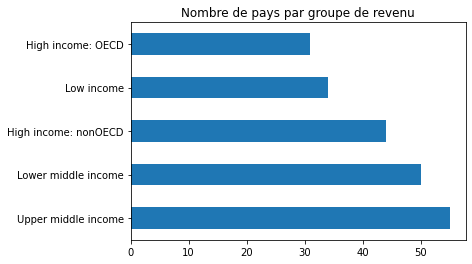

In [5]:
#all_incomes = set(countries_only['Income Group'].tolist())
#print(all_incomes)
income_count = countries_only['Income Group'].value_counts()
income_count.plot(kind='barh')
plt.title('Nombre de pays par groupe de revenu')
plt.show()

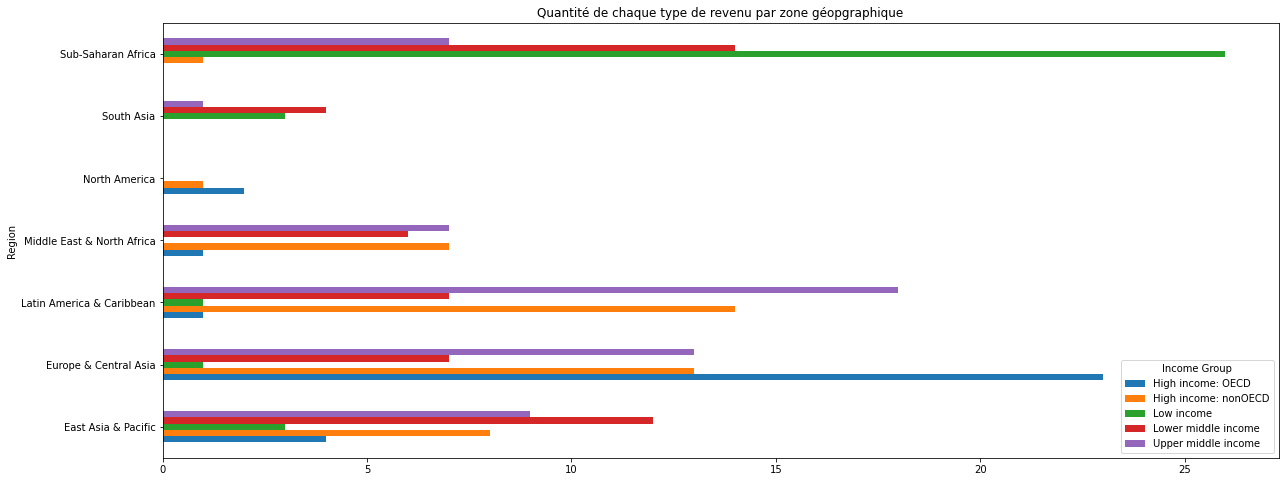

In [6]:
countries_only.groupby(['Region','Income Group']).size().unstack().plot(kind='barh',stacked=False)
plt.gcf().set_size_inches(20, 8)
#using gcf to get the current figure
plt.title('Quantité de chaque type de revenu par zone géopgraphique')
plt.show()

### EdStatsCountry_series

In [7]:
country_series = pd.read_csv(path + 'EdStatsCountry-series.csv')
country_series.head(5)

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [8]:
print(country_series.shape)

(613, 4)


In [9]:
country_code = country_series['CountryCode'].unique()
print(country_code, len(country_code))

['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC' 'NLD' 'NOR'
 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRK'
 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'S

### EdStatsData

In [10]:
data = pd.read_csv(path + 'EdStatsData.csv')
data.head(5)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [11]:
print(data.shape)
names = data["Country Name"].unique()
codes = data["Country Code"].unique()
indicators = data["Indicator Name"].unique()
print(len(names))
print(len(codes))
print(indicators , len(indicators))

(886930, 70)
242
242
['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 ... 'Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)'] 3665


In [12]:
new_data = data[data['Country Name'].isin(all_countries)]
new_data.shape

(714675, 70)

In [13]:
new_data_counted = new_data.groupby('Country Name').count()
new_data_counted

Country Code  Indicator Name  Indicator Code  1970  1971  \
Country Name                                                                   
Afghanistan                 3665            3665            3665   523   139   
Albania                     3665            3665            3665   409    78   
Algeria                     3665            3665            3665   416   190   
American Samoa              3665            3665            3665     2     9   
Andorra                     3665            3665            3665    41    63   
...                          ...             ...             ...   ...   ...   
Vanuatu                     3665            3665            3665   131   131   
Vietnam                     3665            3665            3665   410    50   
West Bank and Gaza          3665            3665            3665    35    35   
Zambia                      3665            3665            3665   518   117   
Zimbabwe                    3665            3665            3665   481   127   

                    1972  1973  1974  1975  1976  ...  2060  2065  2070  2075  \
Country Name                                      ...                           
Afghanistan          158   236   351   537   164  ...     0     0     0     0   
Albania               74    50    50   410   105  ...   308   308   308   308   
Algeria              298   325   327   688   328  ...   308   308   308   308   
American Samoa        23    23    23    23    21  ...     0     0     0     0   
Andorra               63    63    63    99    63  ...     0     0     0     0   
...                  ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
Vanuatu              127   131   131   106   127  ...   308   308   308   308   
Vietnam               50    50    50   410   120  ...   308   308   308   308   
West Bank and Gaza    35    35    35    36    41  ...   308   308   308   308   
Zambia               259   216   270   591   310  ...   308   308   308   308   
Zimbabwe             127   135   135   491   135  ...   308   308   308   308   

                    2080  2085  2090  2095  2100  Unnamed: 69  
Country Name                                                   
Afghanistan            0     0     0     0     0            0  
Albania              308   308   308   308   308            0  
Algeria              308   308   308   308   308            0  
American Samoa         0     0     0     0     0            0  
Andorra                0     0     0     0     0            0  
...                  ...   ...   ...   ...   ...          ...  
Vanuatu              308   308   308   308   308            0  
Vietnam              308   308   308   308   308            0  
West Bank and Gaza   308   308   308   308   308            0  
Zambia               308   308   308   308   308            0  
Zimbabwe             308   308   308   308   308            0  

[195 rows x 69 columns]

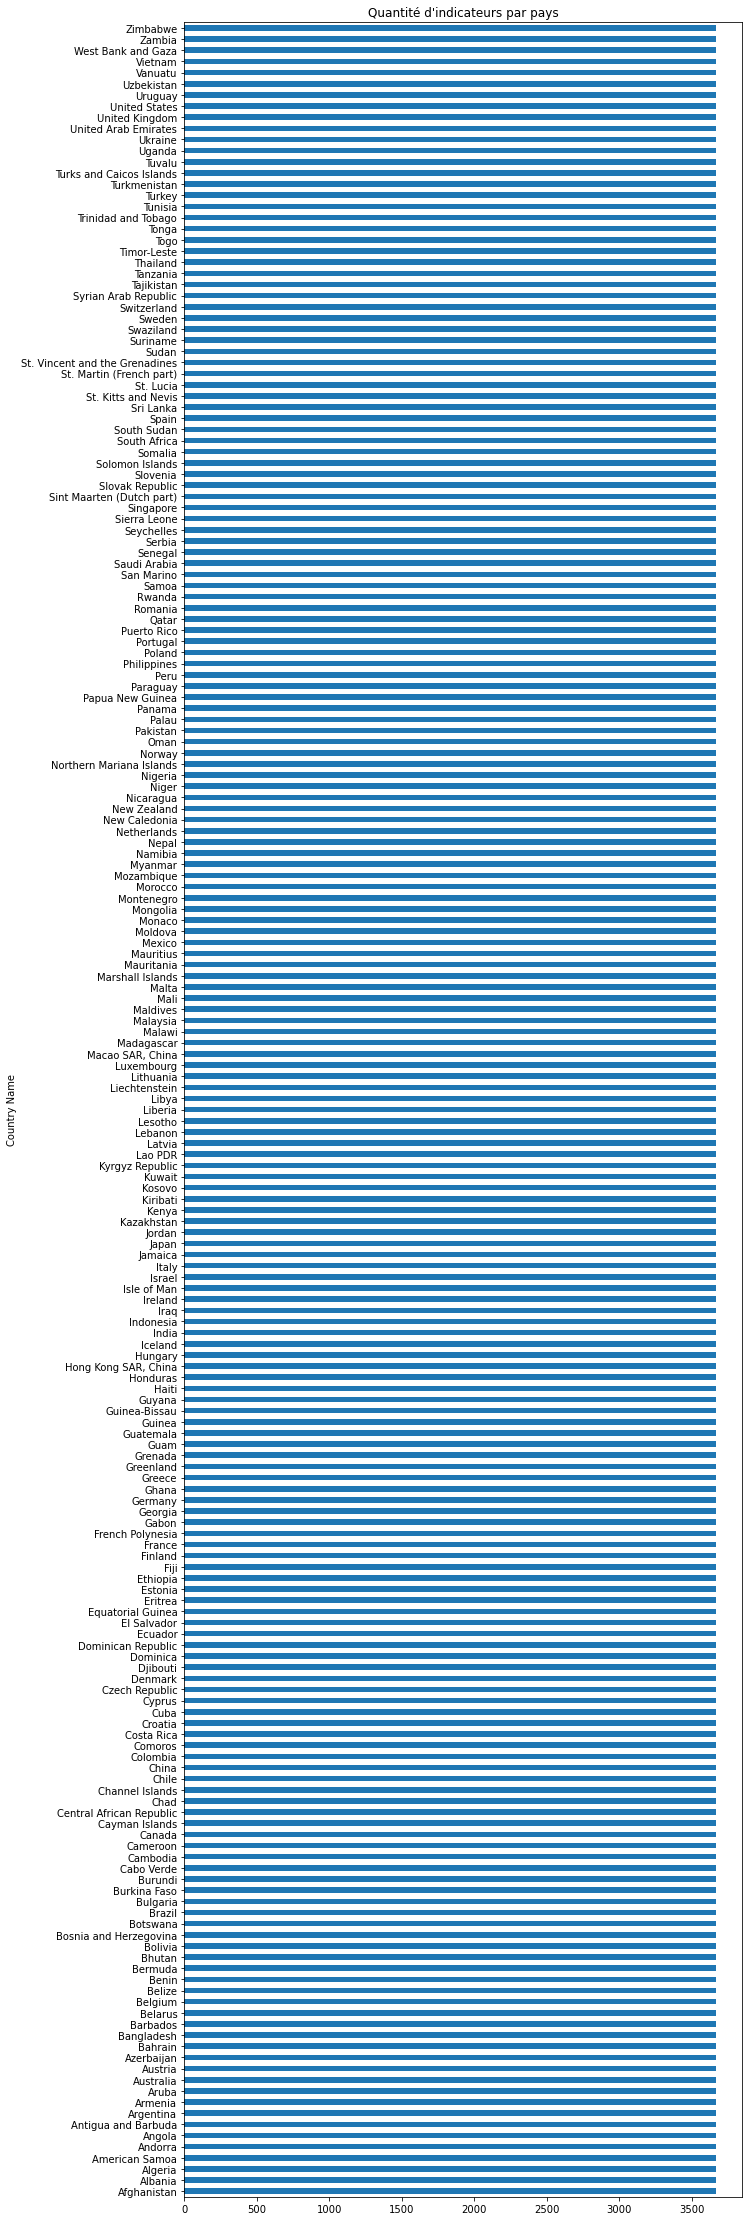

In [14]:
new_data.groupby("Country Name")["Indicator Name"].count().plot(kind ='barh')
plt.gcf().set_size_inches(10, 40)
plt.title("Quantité d'indicateurs par pays")
plt.show()

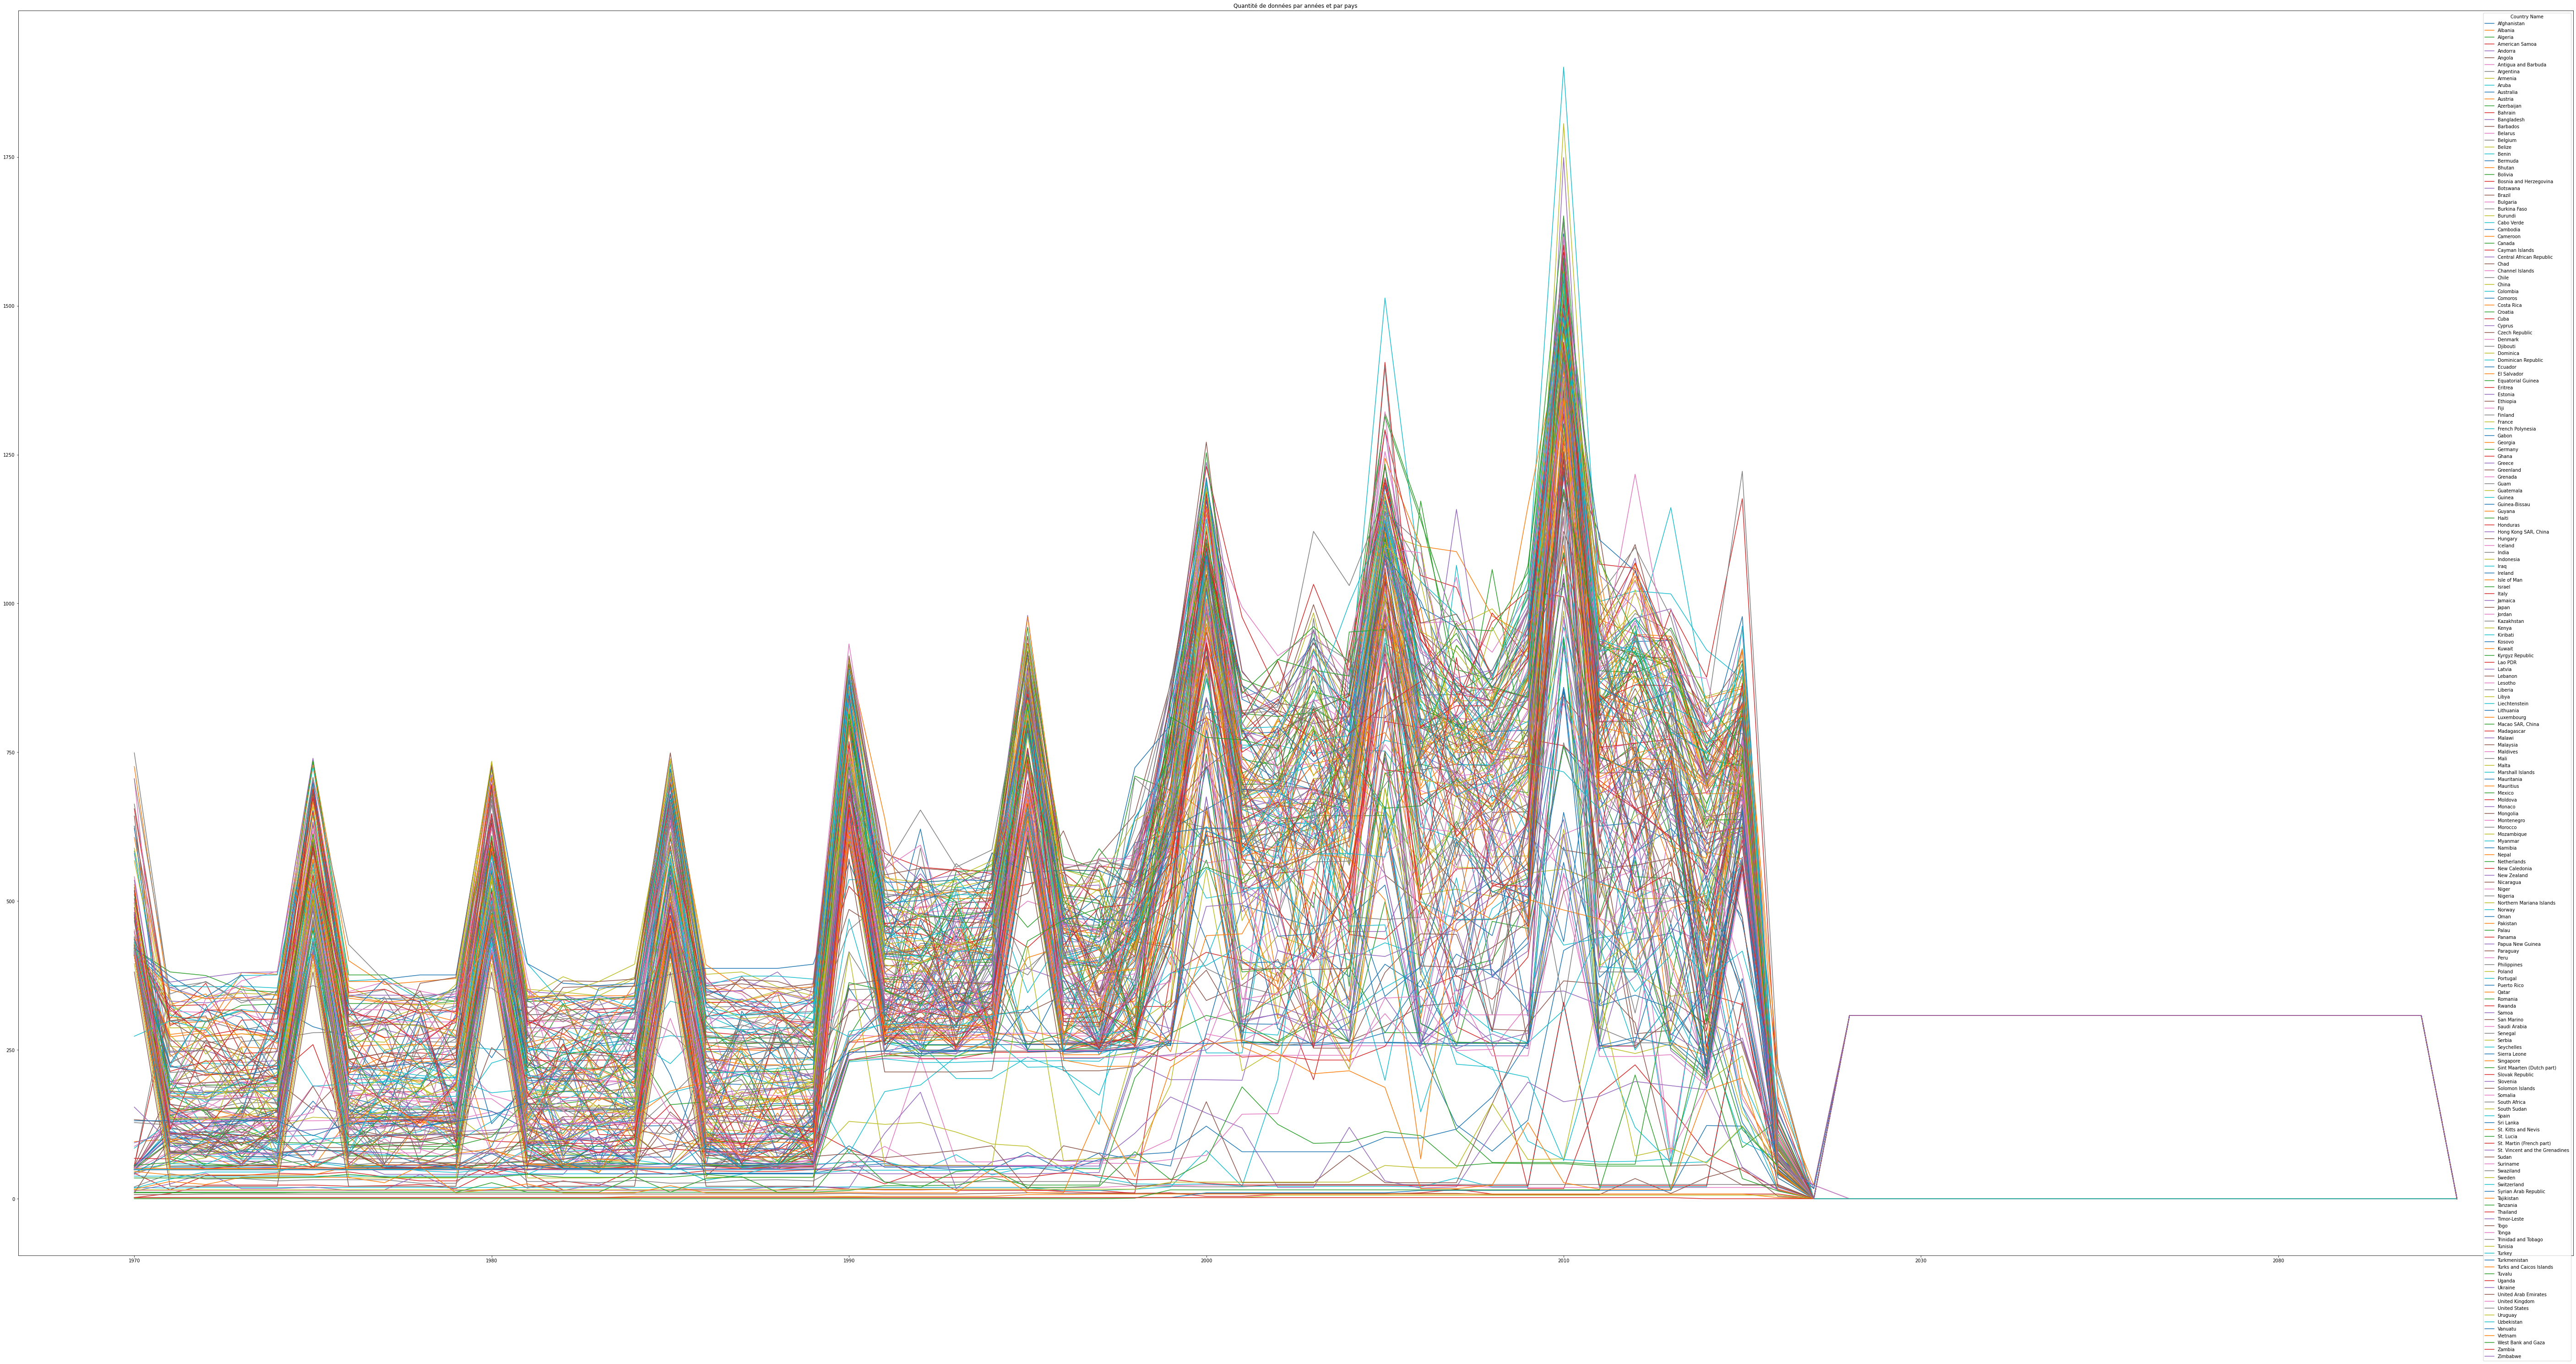

In [15]:
#columns_names = new_data.columns.tolist()
#for i in range(4,len(new_data.columns)):
    #new_data.groupby("Country Name")[columns_names[i]].count().plot(kind ='barh')
    #plt.gcf().set_size_inches(10, 40)
    #plt.title("Quantité de données pour l'année " + str(columns_names[i]))
    #plt.show()
    
columns_names = new_data.columns.tolist()
all_years = []
for i in range(4,len(new_data.columns)):
    all_years.append(new_data.groupby("Country Name")[columns_names[i]].count())
    
pd.DataFrame(all_years).plot()
plt.gcf().set_size_inches(100, 50)
plt.title("Quantité de données par années et par pays")
plt.show()

### EdStatsFootNote

In [16]:
footnote = pd.read_csv(path + 'EdStatsFootNote.csv')
footnote.head(5)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [17]:
footnote.shape

(643638, 5)

In [18]:
footnote['Year'].sort_values().unique()

array(['YR1970', 'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975',
       'YR1976', 'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981',
       'YR1982', 'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987',
       'YR1988', 'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993',
       'YR1994', 'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR1999',
       'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005',
       'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [19]:
footnote['Year'] = footnote['Year'].apply(lambda x : x[2:])
footnote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

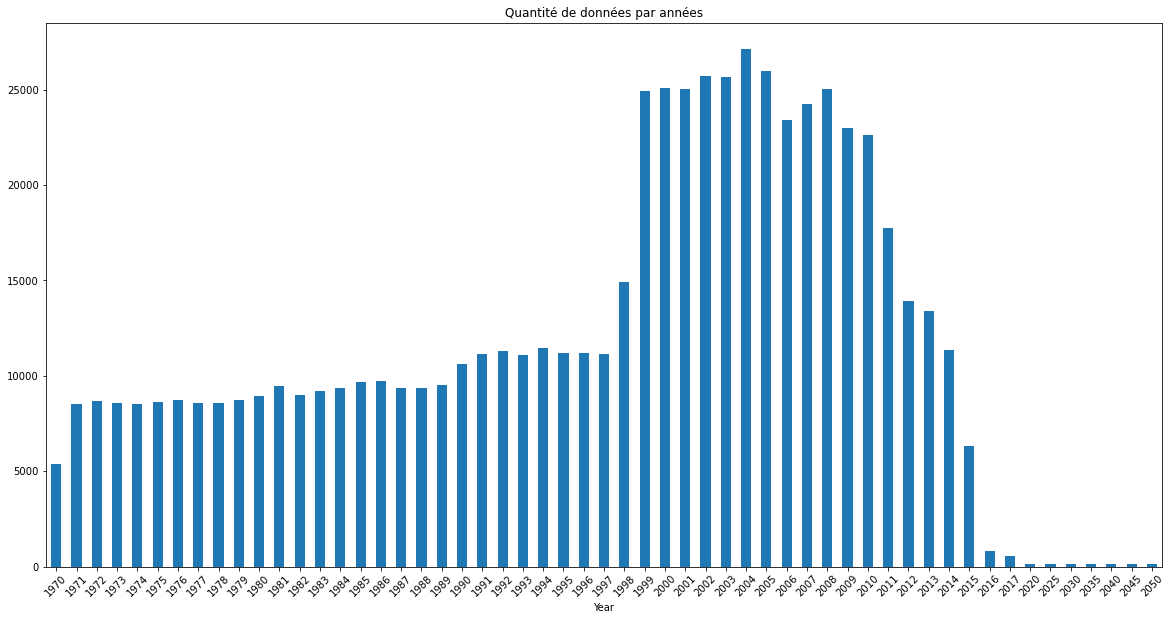

In [20]:
year_by_country = pd.DataFrame(footnote.groupby('Year')["CountryCode"].count())
year_by_country.plot(kind = "bar", legend=None)
plt.gcf().set_size_inches(20, 10)
plt.title("Quantité de données par années")
plt.xticks(rotation=45)
plt.show()

In [49]:
new_data_regroup = new_data.copy()

new_data_regroup.loc[:,'1970s'] = new_data[[str(year) for year in range(1970,1980,1)]].mean(1)
new_data_regroup.loc[:,'1980s'] = new_data[[str(year) for year in range(1980,1990,1)]].mean(1)
new_data_regroup.loc[:,'1990s'] = new_data[[str(year) for year in range(1990,2000,1)]].mean(1)
new_data_regroup.loc[:,'2000s'] = new_data[[str(year) for year in range(2000,2010,1)]].mean(1)
new_data_regroup.loc[:,'2010s'] = new_data[[str(year) for year in range(2010,2017,1)]].mean(1)
new_data_regroup.loc[:,'2020s'] = new_data[[str(year) for year in [2020,2025]]].mean(1)
new_data_regroup.loc[:,'2030s'] = new_data[[str(year) for year in [2030,2035]]].mean(1)
new_data_regroup.loc[:,'2040s'] = new_data[[str(year) for year in [2040,2045]]].mean(1)
new_data_regroup.loc[:,'2050s'] = new_data[[str(year) for year in [2050,2055]]].mean(1)
new_data_regroup.loc[:,'2060s'] = new_data[[str(year) for year in [2060,2065]]].mean(1)
new_data_regroup.loc[:,'2070s'] = new_data[[str(year) for year in [2070,2075]]].mean(1)
new_data_regroup.loc[:,'2080s'] = new_data[[str(year) for year in [2080,2085]]].mean(1)
new_data_regroup.loc[:,'2090s'] = new_data[[str(year) for year in [2090,2095]]].mean(1)
new_data_regroup.loc[:,'2100s'] = new_data[[str(2100)]].mean(1)

new_data_regroup.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)


new_data_regroup.head(5)

Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   
91627  Afghanistan          AFG   
91628  Afghanistan          AFG   
91629  Afghanistan          AFG   

                                          Indicator Name  Indicator Code  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

          1970s  1980s      1990s      2000s      2010s  2020s  2030s  2040s  \
91625   7.05911    NaN  17.260189  28.059870  49.032011    NaN    NaN    NaN   
91626   2.53138    NaN   9.431810  15.223100  35.857401    NaN    NaN    NaN   
91627   0.22154    NaN   0.386230   0.379130   0.582715    NaN    NaN    NaN   
91628  11.42652    NaN  24.420429  40.152851  61.497005    NaN    NaN    NaN   
91629       NaN    NaN        NaN        NaN        NaN    NaN    NaN    NaN   

       2050s  2060s  2070s  2080s  2090s  2100s  
91625    NaN    NaN    NaN    NaN    NaN    NaN  
91626    NaN    NaN    NaN    NaN    NaN    NaN  
91627    NaN    NaN    NaN    NaN    NaN    NaN  
91628    NaN    NaN    NaN    NaN    NaN    NaN  
91629    NaN    NaN    NaN    NaN    NaN    NaN

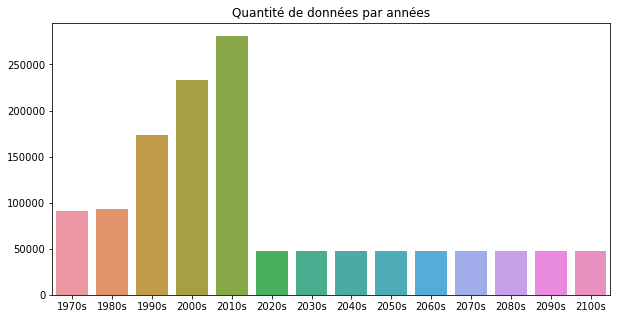

In [46]:
plt.figure(figsize=(10, 5))
all_decade = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s','2050s', '2060s', '2070s', '2080s', '2090s', '2100s']
plt.title('Quantité de données par années')
plot = sns.barplot(y = new_data_regroup.groupby('Country Name')[all_decade].count().sum().values, 
                   x = new_data_regroup.groupby('Country Name')[all_decade].count().sum().index)
plt.show()

In [51]:
new_data_regroup_cleaned = new_data_regroup.drop(['1970s','1980s','1990s','2000s','2020s','2030s','2040s','2050s','2060s','2070s','2080s','2090s','2100s'],axis=1)
new_data_regroup_cleaned.head(5)

Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   
91627  Afghanistan          AFG   
91628  Afghanistan          AFG   
91629  Afghanistan          AFG   

                                          Indicator Name  Indicator Code  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

           2010s  
91625  49.032011  
91626  35.857401  
91627   0.582715  
91628  61.497005  
91629        NaN

### EdStatsSeries

In [39]:
series = pd.read_csv(path + 'EdStatsSeries.csv')
series.head(5)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [ ]:
series.shape

## Analyse exploratoire des données

In [101]:
new_data_regroup_cleaned.head(5)
#new_data_regroup_cleaned.columns

Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   
91627  Afghanistan          AFG   
91628  Afghanistan          AFG   
91629  Afghanistan          AFG   

                                          Indicator Name  Indicator Code  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

           2010s  
91625  49.032011  
91626  35.857401  
91627   0.582715  
91628  61.497005  
91629        NaN

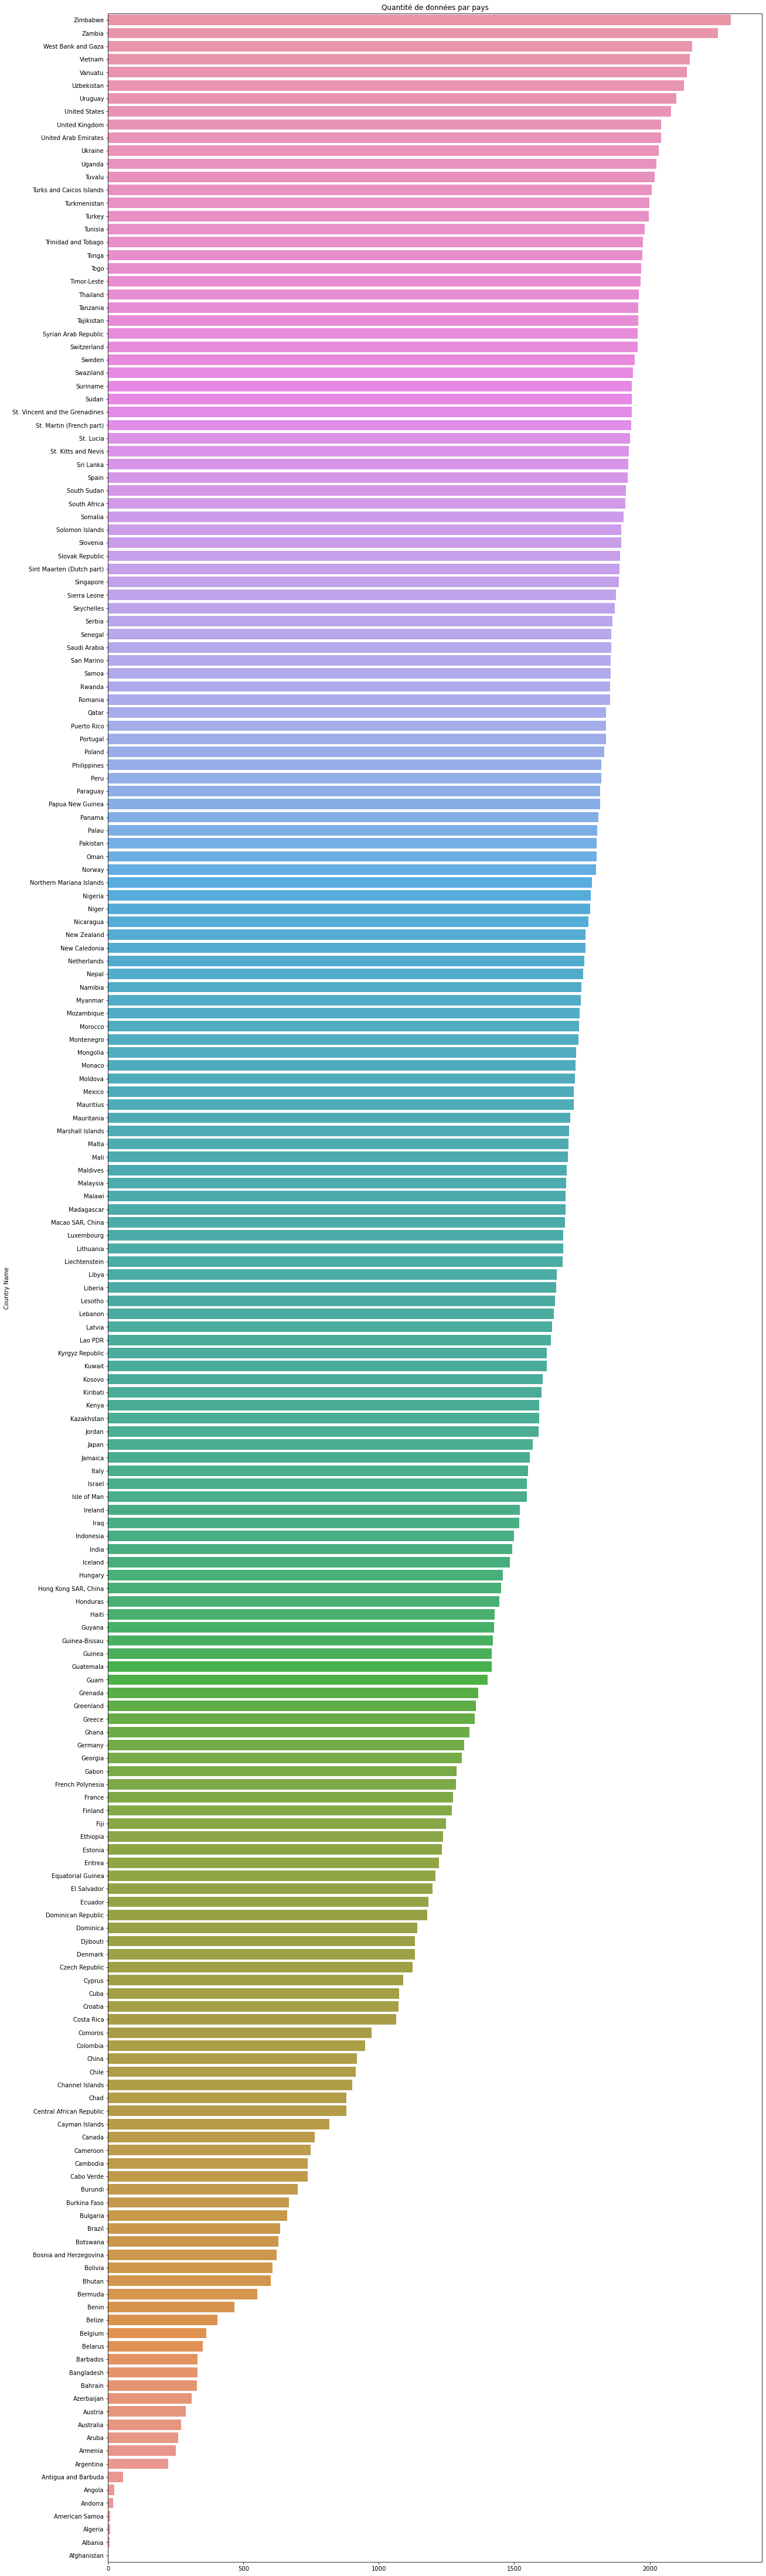

In [61]:
plt.figure(figsize=(20, 80))
plt.title('Quantité de données par pays')
plot = sns.barplot(new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().sort_values().values, 
                   new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().index)
plt.gca().invert_yaxis()

In [86]:
indicator_occ = new_data_regroup_cleaned.groupby('Indicator Name')['2010s'].count().sort_values(ascending=False)
indicator_occ = pd.DataFrame(indicator_occ)
indicator_occ

2010s
Indicator Name                                           
Population growth (annual %)                          195
Population, total                                     195
GDP at market prices (current US$)                    187
Official entrance age to primary education (years)    187
GDP per capita (current US$)                          187
...                                                   ...
SABER: (Tertiary Education) Policy Goal 2: Regu...      0
SABER: (Tertiary Education) Policy Goal 3 Lever...      0
SABER: (Tertiary Education) Policy Goal 3 Lever...      0
SABER: (Tertiary Education) Policy Goal 3: Gove...      0
EGRA: Reading Comprehension - Share of students...      0

[3665 rows x 1 columns]

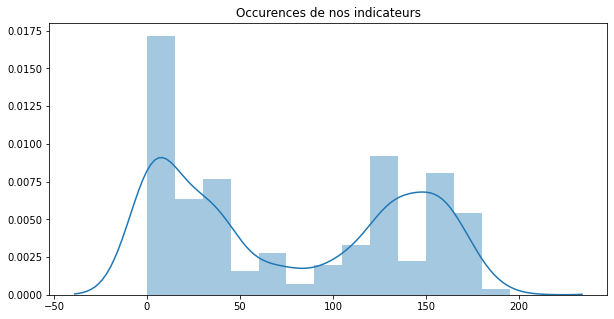

In [99]:
plt.figure(figsize=(10,5))
plt.title('Occurences de nos indicateurs')
sns.distplot(indicator_occ)
plt.show()